# **Lesson 07 : Data Mining Feature Importance**

In [5]:
# Library
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import pandas as pd

### **1. Get Data**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_name = 'AI Specialist Lesson 07.zip'
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_path = os.path.join(path, data_name)
print(data_path)

os.mkdir('Lesson 07')
working_dir = os.path.join('/content', 'Lesson 07')
os.chdir(working_dir)

with zipfile.ZipFile(data_path, 'r') as data_zipfile:
  data_zipfile.extractall(working_dir)

/content/drive/MyDrive/Colab Notebooks/Datasets/AI Specialist Lesson 07.zip


In [8]:
data = pd.read_csv('AI Specialist Lesson 07/diabetes.csv')
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **2. Data Describe**

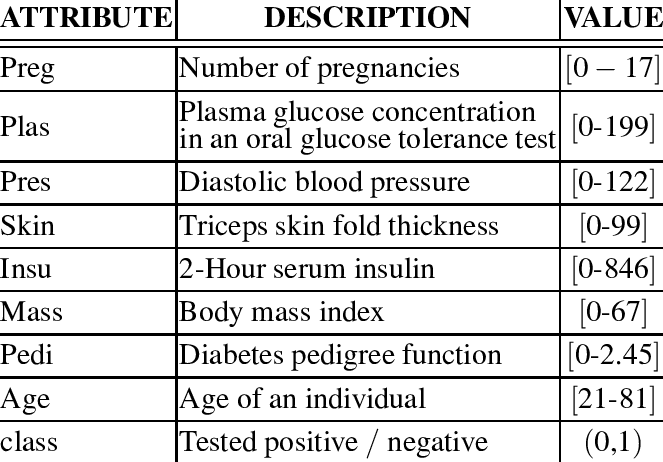

In [9]:
display(Image(filename='AI Specialist Lesson 07/Dataset Description.png'))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
print(data.shape)
data.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### **Note:**
* Data giữa 2 class chênh lệch nhau không quá lớn.
* ==> Không có hiện tượng `Imbalance`
* ==> Có thể dùng `Accuracy` để đánh giá `Classification model`.

### **3. Preprocessing Data**

>**Nhận Xét:**
* Các cột `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` có giá trị bằng `0` là các giá trị sai.
* ==> Thay thế các giá trị này bằng `mean` của chính cột đó.

In [13]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols] = data[cols].replace(0, np.NaN)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **4. Approach 1: Find Feature Importance by Correlation**

##### **4.1 Feature Importance**
* Là feature có độ tương quan với `Outcome` lớn nhất trong tất cả các feature.

In [16]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [17]:
FeatureImp1 = data.corr()['Outcome'].sort_values(ascending=False)[1:]
FeatureImp1

Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

>**Nhận Xét:**
* `Glucose` là feature quan trọng nhất vì có tương quan với `Outcome` lớn nhất.

##### **4.2 Build MLs to predict Outcome**

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

print(X.shape)
print(y.shape)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(768, 8)
(768,)
(537, 8)
(537,)
(231, 8)
(231,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logitReg = LogisticRegression()
logitReg.fit(X_train, y_train)
y_predict = logitReg.predict(X_test)
Score = metrics.accuracy_score(y_test, y_predict)
print(Score)

0.7705627705627706


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### **5. Approach 2: Random Forest**
* `Random forest` gồm nhiều `Decision Tree`.
* Tại mỗi `Decision Tree` sẽ cho ra 1 feature quan trọng nhất, dựa trên `sub-dataset` từ `dataset` ban đầu.
* Feature quan trọng nhất nếu nó quan trọng nhất ở nhiều `Decision Tree` nhất.

In [20]:
print(y_test)

746    1
117    0
100    1
211    0
497    0
      ..
530    0
606    1
420    0
112    0
538    0
Name: Outcome, Length: 231, dtype: int64


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=93)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
Score = metrics.accuracy_score(y_test, y_predict)
print(Score)

0.7445887445887446


In [29]:
importances = rf.feature_importances_
print(importances)

[0.08278938 0.24963852 0.07523458 0.06887928 0.09490948 0.15890544
 0.1357375  0.13390583]


In [31]:
X_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
FeatureImp2 = pd.Series({feature:imp for feature,imp in zip(X_test.columns, importances)})
FeatureImp2.sort_values(ascending=False)

Glucose                     0.249639
BMI                         0.158905
DiabetesPedigreeFunction    0.135737
Age                         0.133906
Insulin                     0.094909
Pregnancies                 0.082789
BloodPressure               0.075235
SkinThickness               0.068879
dtype: float64

>**Note:**
* `Glucose` vẫn là feature quan trọng nhất.

### **6. Approach 3: Recursive Feature Elimination(RFE)**
* Tiến hành tính `accuracy` của model khi có đầy đủ `feature`.
* Lần lượt Loại bỏ 1 `feature` bất kỳ, tính `accuracy` của model trong mỗi trường hợp. Trường hợp có `accuracy` giảm nhiều nhất ==> `feature` tương ứng đã bỏ đi là quan trọng nhất.
* Với `n-1` `feature`(bỏ `feature` quan trọng nhất vừa tìm được ra) ta lại làm tương tự để thu được `feature` quan trọng thứ nhì.

In [37]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=100, random_state=93)
rfe = RFE(model, n_features_to_select=1)
result = rfe.fit(X_train, y_train)

In [38]:
print(result.n_features_)
print(result.ranking_)

1
[6 1 7 8 5 2 3 4]


In [41]:
FeatureImp3 = pd.Series({feature:imp for feature, imp in zip(X_test.columns, result.ranking_)})
FeatureImp3.sort_values(ascending=True)

Glucose                     1
BMI                         2
DiabetesPedigreeFunction    3
Age                         4
Insulin                     5
Pregnancies                 6
BloodPressure               7
SkinThickness               8
dtype: int64

>**Note:**
* `Glucose` vẫn là feature quan trọng nhất

### **7. Approach 4: Sequential Forward Selection(SFS)**
* Với bộ `n` `feature` đầy đủ: A, B, C, D, E.
* Tính `accuracy` của model riêng từng `feature` ==> Thu được `feature` có `accuracy` lớn nhất là `feature` quan trọng nhất (Ex: A).
* Lần lượt ghép `feature` A với 4 `feature` còn lại (AC, AB, AD, AE) ==> `accuracy` trong trường hợp nào lớn nhất, ta thu được `feature` quan trọng thứ nhì.
* Làm tương tự đến `feature` cuối cùng.

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

rf = RandomForestClassifier(n_estimators=100, random_state=93)
sfs = SFS(rf, n_features_to_select=1, scoring='accuracy')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=93),
                          n_features_to_select=1, scoring='accuracy')

In [56]:
sfs.get_support().astype(int)

array([0, 1, 0, 0, 0, 0, 0, 0])

In [61]:
result_list = []
for i in range(1, len(X_test.columns)):
  rf = RandomForestClassifier(n_estimators=100, random_state=93)
  sfs = SFS(rf, n_features_to_select=i, scoring='accuracy')
  sfs.fit(X_train, y_train)
  result = sfs.get_support().astype(int)
  print(result)
  result_list.append(result)

[0 1 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1]
[0 1 0 0 0 1 0 1]
[0 1 0 1 0 1 0 1]
[0 1 0 1 1 1 0 1]
[0 1 0 1 1 1 1 1]
[0 1 1 1 1 1 1 1]


In [68]:
sum(list(result_list)) + 1

array([1, 8, 2, 5, 4, 6, 3, 7])

In [70]:
FeatureImp4 = pd.Series({feature:imp for feature, imp in zip(X_test.columns, sum(list(result_list))+1)})
FeatureImp4.sort_values(ascending=False)

Glucose                     8
Age                         7
BMI                         6
SkinThickness               5
Insulin                     4
DiabetesPedigreeFunction    3
BloodPressure               2
Pregnancies                 1
dtype: int64

>**Note:**
* `Glucose` vẫn là feature quan trọng nhất